### Machine Learning models. 

In this process we will use some machine learning models in order to see how is the performance on each one. 

In [1]:
import mlflow

# Ensure that you introduce the port accordingly.
# mlflow ui --host 127.0.0.1 --port 8080
mlflow.set_tracking_uri(uri="http://<host>:<port>")


In [49]:
import mlflow
from mlflow.models import infer_signature

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the Iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)


In [7]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    # Infer the model signature
    signature = infer_signature(X_train, lr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )


2024/01/30 21:51:16 INFO mlflow.tracking.fluent: Experiment with name 'MLflow Quickstart' does not exist. Creating a new experiment.


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'tracking-quickstart'.
2024/01/30 21:51:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 1
Created version '1' of model 'tracking-quickstart'.


In [8]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test)

iris_feature_names = datasets.load_iris().feature_names

result = pd.DataFrame(X_test, columns=iris_feature_names)
result["actual_class"] = y_test
result["predicted_class"] = predictions

result[:4]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_class,predicted_class
0,6.1,2.8,4.7,1.2,1,1
1,5.7,3.8,1.7,0.3,0,0
2,7.7,2.6,6.9,2.3,2,2
3,6.0,2.9,4.5,1.5,1,1


In [13]:
%pip install nbformat --upgrade

                                              0.0/77.6 kB ? eta -:--:--
     --------------------                   41.0/77.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 77.6/77.6 kB 863.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import plotly.express as px

from ipywidgets import widgets
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



ModuleNotFoundError: No module named 'cufflinks'

In [62]:
import plotly.graph_objects as go

df = px.data.stocks()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.date, y=df.AAPL,
              mode='lines+markers'))

In [75]:
import plotly.express as px

df = px.data.tips()
fig = px.scatter(
    df, x='total_bill', y='tip', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")
df.iplot()

AttributeError: 'DataFrame' object has no attribute 'iplot'

In [64]:
df.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [68]:
fig = px.scatter_3d(df, x='date', y='GOOG', z='AAPL', color='NFLX')
fig

In [74]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

class InteractiveScatterPlot:
    def __init__(self, df):
        self.df = df
        self.setup_widgets()
        self.setup_plot()
        self.observe_widgets()

    def setup_widgets(self):
        self.variable_x = widgets.Dropdown(
            description='Select X Variable:',
            options=self.df.columns.tolist(),
            value='sepal_length'
        )

        self.variable_y = widgets.Dropdown(
            description='Select Y Variable:',
            options=self.df.columns.tolist(),
            value='sepal_width'
        )

        self.update_button = widgets.Button(description="Update Chart")
        self.update_button.on_click(self.update_chart)

    def setup_plot(self):
        self.fig = px.scatter(self.df, x=self.df['sepal_length'], y=self.df['sepal_width'],
                              labels={'sepal_length': 'Sepal Length', 'sepal_width': 'Sepal Width'},
                              title='Interactive Scatter Plot')

    def response(self, change):
        # No need for this function if using the update button
        pass

    def update_chart(self, _):
        x_data = self.df[self.variable_x.value]
        y_data = self.df[self.variable_y.value]

        with self.fig.batch_update():
            self.fig.data = []  # Clear previous traces
            self.fig.add_trace(px.scatter(self.df, x=x_data, y=y_data,
                                          labels={self.variable_x.value: self.variable_x.label,
                                                  self.variable_y.value: self.variable_y.label}).data[0])

    def observe_widgets(self):
        self.variable_x.observe(self.response, names="value")
        self.variable_y.observe(self.response, names="value")

    def display(self):
        container = widgets.HBox([self.variable_x, self.variable_y, self.update_button])
        display(container)
        display(self.fig)

# Example usage
iris_df = px.data.iris()
scatter_plot = InteractiveScatterPlot(iris_df)
scatter_plot.display()


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib widget
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = FuncAnimation(fig=fig, func=update, frames=40, interval=30)
ani.to_html5_video()


<IPython.core.display.Javascript object>

'<video width="640" height="480" controls autoplay loop>\n  <source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAKKZtZGF0AAACrwYF//+r\n3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwNiBlYWE2OGZhIC0gSC4yNjQvTVBF\nRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u\nb3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs\neXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk\nX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk\nZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy\nIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50\nZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi\nX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w\nPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y\nZWZyZXNoPTAgcmNfbG9va2FoZWFkPT

In [94]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

In [110]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [111]:

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date])

textbox = widgets.Dropdown(
    description='Eje x:   ',
    value='carrier',
    options=df.columns.tolist()
)

origin = widgets.Dropdown(
    options=df.columns.tolist(),
    value='flight',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))

In [112]:
textbox.value

'carrier'

In [113]:
def validate():
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['carrier'] == textbox.value,
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [108]:
container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])

In [114]:
import plotly.graph_objects as go

trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'])
data=[trace]
layout = go.Layout(title='Activity Heatmap')

figure = go.Figure(data=data, layout=layout)

f2 = go.FigureWidget(figure)
f2

FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '08e27941-df31-4db6-a116-b451b7b9eb9e',
              'x': [Monday, Tuesday, Wednesday, Thursday, Friday],
              'y': [Morning, Afternoon, Evening],
              'z': [[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]]}],
    'layout': {'template': '...', 'title': {'text': 'Activity Heatmap'}}
})

Coeficientes para el conjunto completo: [-0.11190585 -0.04007949  0.22864503  0.60925205]
Coeficientes del clúster 0: [ 1.00000000e+00 -1.14351057e-16  1.00737392e-16  3.38548788e-17]
Coeficientes del clúster 1: [ 1.00000000e+00  6.10461501e-16 -1.04156687e-16 -6.39354260e-17]
Coeficientes del clúster 2: [ 1.00000000e+00 -5.68282031e-17  1.84902767e-16  1.16550345e-16]


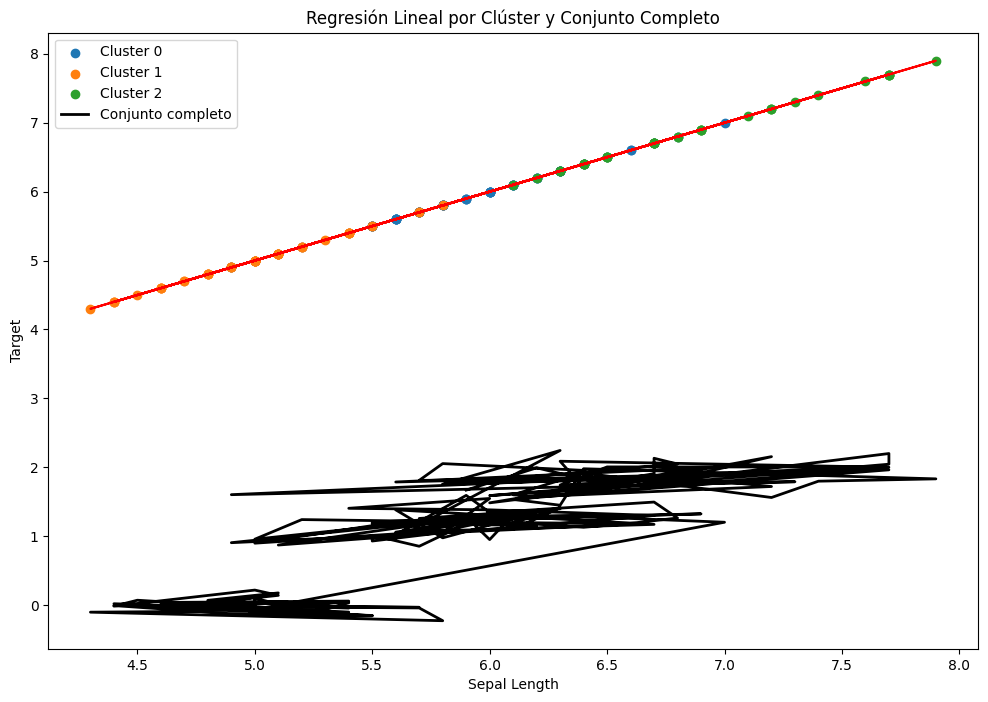

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar K-Means para realizar clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Agregar información de clúster al conjunto de datos
data_with_clusters = pd.DataFrame(np.column_stack((X, y, clusters)), columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'cluster'])

# Realizar regresión en todo el conjunto
regression_all = LinearRegression()
regression_all.fit(X, y)

# Imprimir los coeficientes de regresión para todo el conjunto
print("Coeficientes para el conjunto completo:", regression_all.coef_)

# Realizar regresión en cada clúster y plotear los resultados
plt.figure(figsize=(12, 8))

for cluster_label in set(clusters):
    cluster_data = data_with_clusters[data_with_clusters['cluster'] == cluster_label]
    X_cluster = cluster_data.iloc[:, :-2]  # Características excluyendo la etiqueta de especie y el clúster
    y_cluster = cluster_data['sepal_length']  # Variable de respuesta

    # Ajustar un modelo de regresión lineal para cada clúster
    regression_model = LinearRegression()
    regression_model.fit(X_cluster, y_cluster)

    # Imprimir los coeficientes de regresión para cada clúster
    print(f"Coeficientes del clúster {cluster_label}:", regression_model.coef_)

    # Plotear los datos y la línea de regresión para cada clúster
    plt.scatter(X_cluster['sepal_length'], y_cluster, label=f'Cluster {cluster_label}')
    plt.plot(X_cluster['sepal_length'], regression_model.predict(X_cluster), color='red')

# Plotear la línea de regresión para todo el conjunto
plt.plot(X[:, 0], regression_all.predict(X), color='black', linewidth=2, label='Conjunto completo')

# Configuración de la gráfica
plt.title('Regresión Lineal por Clúster y Conjunto Completo')
plt.xlabel('Sepal Length')
plt.ylabel('Target')
plt.legend()
plt.show()


In [132]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Cargar datos de ejemplo (puedes reemplazar esto con tus propios datos)
df = px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [158]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Load example data (you can replace this with your own data)
df = px.data.tips()
dict_df = {'df1': df, 'df2': df}

# Create subplots with the specified number of rows
number_rows = len(df.columns)
fig = make_subplots(rows=number_rows, cols=1, subplot_titles=df.columns.tolist())

# Iterate over each column and add a scatter plot to the corresponding subplot
for i, column in enumerate(df.columns):
    for key, data in dict_df.items():
        fig.add_trace(
            go.Scatter(x=data['total_bill'], y=data[column], mode='markers', name=f"{key} - {column}"),
            row=i + 1, col=1
        )

# Update layout
fig.update_layout(height=1200, width=800, title_text="Side By Side Subplots")

# Create slider steps
steps = []
for i, key in enumerate(dict_df):
    step = dict(
        method="update",
        label=f"Data #{i + 1}",
        args=[{"visible": [False] * len(df.columns) * len(dict_df)},
              {"title": f"Slider switched to step: {i + 1}"}],
    )
    for j, column in enumerate(df.columns):
        step["args"][0]["visible"][i * len(df.columns) + j] = True
    steps.append(step)

# Add slider
sliders = [dict(
    active=0,
    steps=steps,
)]

fig.update_layout(updatemenus=sliders)

# Show the plot
fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Updatemenu: 'steps'

Did you mean "type"?

    Valid properties:
        active
            Determines which button (by index starting from 0) is
            considered active.
        bgcolor
            Sets the background color of the update menu buttons.
        bordercolor
            Sets the color of the border enclosing the update menu.
        borderwidth
            Sets the width (in px) of the border enclosing the
            update menu.
        buttons
            A tuple of
            :class:`plotly.graph_objects.layout.updatemenu.Button`
            instances or dicts with compatible properties
        buttondefaults
            When used in a template (as
            layout.template.layout.updatemenu.buttondefaults), sets
            the default property values to use for elements of
            layout.updatemenu.buttons
        direction
            Determines the direction in which the buttons are laid
            out, whether in a dropdown menu or a row/column of
            buttons. For `left` and `up`, the buttons will still
            appear in left-to-right or top-to-bottom order
            respectively.
        font
            Sets the font of the update menu button text.
        name
            When used in a template, named items are created in the
            output figure in addition to any items the figure
            already has in this array. You can modify these items
            in the output figure by making your own item with
            `templateitemname` matching this `name` alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). Has no effect outside of a
            template.
        pad
            Sets the padding around the buttons or dropdown menu.
        showactive
            Highlights active dropdown item or active button if
            true.
        templateitemname
            Used to refer to a named item in this array in the
            template. Named items from the template will be created
            even without a matching item in the input figure, but
            you can modify one by making an item with
            `templateitemname` matching its `name`, alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). If there is no template or no
            matching item, this item will be hidden unless you
            explicitly show it with `visible: true`.
        type
            Determines whether the buttons are accessible via a
            dropdown menu or whether the buttons are stacked
            horizontally or vertically
        visible
            Determines whether or not the update menu is visible.
        x
            Sets the x position (in normalized coordinates) of the
            update menu.
        xanchor
            Sets the update menu's horizontal position anchor. This
            anchor binds the `x` position to the "left", "center"
            or "right" of the range selector.
        y
            Sets the y position (in normalized coordinates) of the
            update menu.
        yanchor
            Sets the update menu's vertical position anchor This
            anchor binds the `y` position to the "top", "middle" or
            "bottom" of the range selector.
        
Did you mean "type"?

Bad property path:
steps
^^^^^

In [159]:
import plotly.express as px
import plotly.io as pio

data1 = {'x': [1, 2, 3, 4, 5], 'y': [10, 15, 13, 17, 20]}
data2 = {'x': [1, 2, 3, 4, 5], 'y': [5, 8, 9, 12, 10]}
data3 = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 1, 2, 2]}

fig = px.line(data1, x='x', y='y', title="Data 1")
fig.add_scatter(x=data2['x'], y=data2['y'], mode='lines')
fig.add_scatter(x=data3['x'], y=data3['y'], mode='lines')

fig.update_traces(visible=False)
fig.data[0].visible = True

steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        label="Data #" + str(i),
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],
    )
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=0,
    buttons=steps
)]

fig.update_layout(updatemenus=sliders)

fig.show()

In [160]:
steps

[{'method': 'update',
  'label': 'Data #0',
  'args': [{'visible': [True, False, False]},
   {'title': 'Slider switched to step: 0'}]},
 {'method': 'update',
  'label': 'Data #1',
  'args': [{'visible': [False, True, False]},
   {'title': 'Slider switched to step: 1'}]},
 {'method': 'update',
  'label': 'Data #2',
  'args': [{'visible': [False, False, True]},
   {'title': 'Slider switched to step: 2'}]}]